In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

In [2]:



df = pd.read_csv("../Data/hr model2/HR_Analytics.csv")
df.head()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   int64  
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                    1480 non-null   object 
 14  HourlyRa

In [4]:
df['PerformanceRating'].value_counts()

PerformanceRating
3    1253
4     227
Name: count, dtype: int64

In [5]:


label_cols = ['JobRole', 'Gender', 'EducationField', 'Department', 'BusinessTravel']

for col in label_cols:
    if col in df.columns:
        df[col] = LabelEncoder().fit_transform(df[col])

X = df[['JobSatisfaction', 'EnvironmentSatisfaction', 'WorkLifeBalance',
        'MonthlyIncome', 'YearsAtCompany', 'Education', 'TrainingTimesLastYear']]

y = df['PerformanceRating']


In [6]:


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [7]:

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("\n", classification_report(y_test, dt_pred))


Decision Tree Accuracy: 0.7601351351351351

               precision    recall  f1-score   support

           3       0.86      0.86      0.86       252
           4       0.20      0.20      0.20        44

    accuracy                           0.76       296
   macro avg       0.53      0.53      0.53       296
weighted avg       0.76      0.76      0.76       296



In [8]:



gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=2, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
print("GradientBoostingClassifier Training Accuracy:", gb_model.score(X_train, y_train))
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))
print("\n", classification_report(y_test, gb_pred))



GradientBoostingClassifier Training Accuracy: 0.8538851351351351
Gradient Boosting Accuracy: 0.8412162162162162

               precision    recall  f1-score   support

           3       0.85      0.99      0.91       252
           4       0.00      0.00      0.00        44

    accuracy                           0.84       296
   macro avg       0.42      0.49      0.46       296
weighted avg       0.72      0.84      0.78       296



In [ ]:

models = {
    'Decision Tree': {
        'model': dt_model,
        'predictions': dt_pred,
        'train_accuracy': dt_model.score(X_train, y_train),
        'test_accuracy': accuracy_score(y_test, dt_pred)
    },
    'Gradient Boosting': {
        'model': gb_model,
        'predictions': gb_pred,
        'train_accuracy': gb_model.score(X_train, y_train),
        'test_accuracy': accuracy_score(y_test, gb_pred)
    }
}

comparison_df = pd.DataFrame({
    'Model': list(models.keys()),
    'Train Accuracy': [models[m]['train_accuracy'] for m in models.keys()],
    'Test Accuracy': [models[m]['test_accuracy'] for m in models.keys()]
})

comparison_df['Overfitting'] = comparison_df['Train Accuracy'] - comparison_df['Test Accuracy']

print("Model Performance Comparison:")
print("="*70)
display(comparison_df.style.format({
    'Train Accuracy': '{:.4f}',
    'Test Accuracy': '{:.4f}',
    'Overfitting': '{:.4f}'
}).background_gradient(cmap='RdYlGn', subset=['Test Accuracy']))

Model Performance Comparison:


,Model,Train Accuracy,Test Accuracy,Overfitting
0,Decision Tree,1.0000,0.7601,0.2399
1,Gradient Boosting,0.8539,0.8412,0.0127


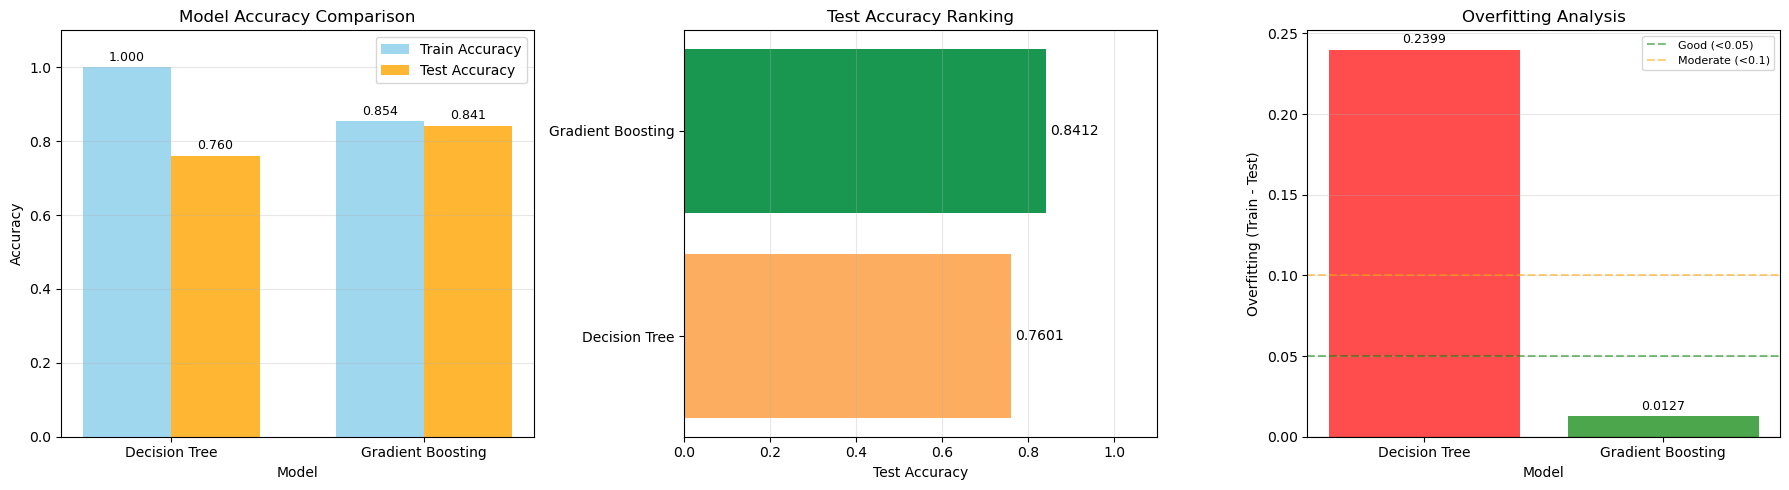

In [ ]:

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

ax1 = axes[0]
x_pos = np.arange(len(comparison_df))
width = 0.35

bars1 = ax1.bar(x_pos - width/2, comparison_df['Train Accuracy'], width, 
                label='Train Accuracy', alpha=0.8, color='skyblue')
bars2 = ax1.bar(x_pos + width/2, comparison_df['Test Accuracy'], width, 
                label='Test Accuracy', alpha=0.8, color='orange')

ax1.set_xlabel('Model')
ax1.set_ylabel('Accuracy')
ax1.set_title('Model Accuracy Comparison')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(comparison_df['Model'])
ax1.legend()
ax1.grid(axis='y', alpha=0.3)
ax1.set_ylim([0, 1.1])


for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)


ax2 = axes[1]
sorted_df = comparison_df.sort_values('Test Accuracy', ascending=True)
colors = plt.cm.RdYlGn(np.linspace(0.3, 0.9, len(sorted_df)))
bars = ax2.barh(sorted_df['Model'], sorted_df['Test Accuracy'], color=colors)
ax2.set_xlabel('Test Accuracy')
ax2.set_title('Test Accuracy Ranking')
ax2.grid(axis='x', alpha=0.3)
ax2.set_xlim([0, 1.1])

for i, (bar, val) in enumerate(zip(bars, sorted_df['Test Accuracy'])):
    ax2.text(val + 0.01, i, f'{val:.4f}', va='center', fontsize=10)


ax3 = axes[2]
colors_overfit = ['green' if x < 0.05 else 'orange' if x < 0.1 else 'red' 
                  for x in comparison_df['Overfitting']]
bars = ax3.bar(comparison_df['Model'], comparison_df['Overfitting'], 
               color=colors_overfit, alpha=0.7)
ax3.set_xlabel('Model')
ax3.set_ylabel('Overfitting (Train - Test)')
ax3.set_title('Overfitting Analysis')
ax3.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
ax3.axhline(y=0.05, color='green', linestyle='--', alpha=0.5, label='Good (<0.05)')
ax3.axhline(y=0.1, color='orange', linestyle='--', alpha=0.5, label='Moderate (<0.1)')
ax3.legend(fontsize=8)
ax3.grid(axis='y', alpha=0.3)

for bar, val in zip(bars, comparison_df['Overfitting']):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 0.002,
            f'{val:.4f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

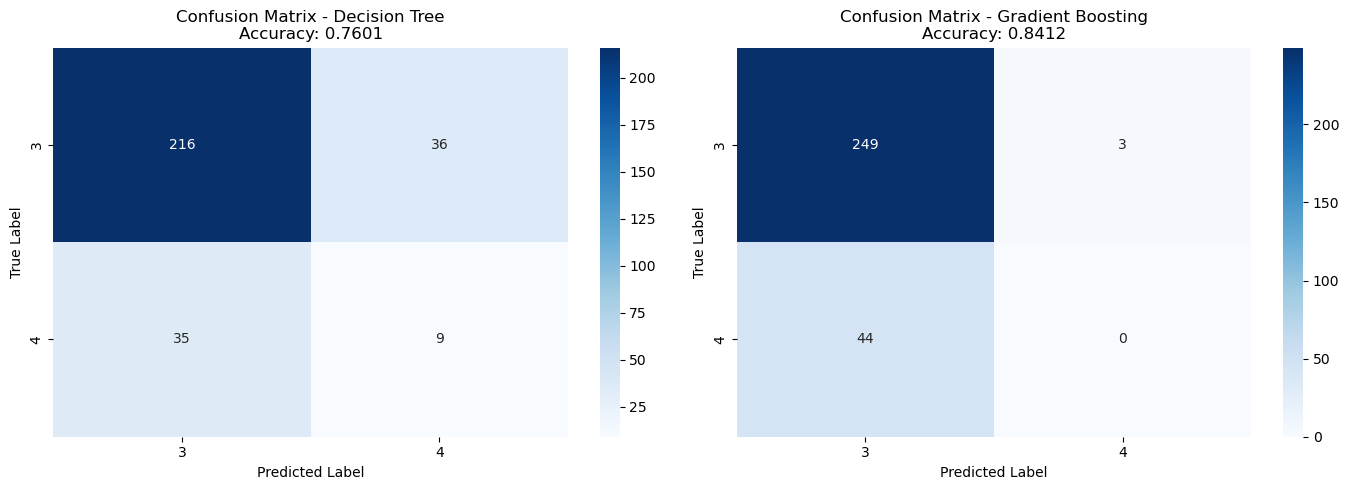


DETAILED CLASSIFICATION METRICS

Decision Tree:
--------------------------------------------------------------------------------
Train Accuracy: 1.0000
Test Accuracy:  0.7601
Overfitting:    0.2399

Classification Report:
              precision    recall  f1-score   support

           3       0.86      0.86      0.86       252
           4       0.20      0.20      0.20        44

    accuracy                           0.76       296
   macro avg       0.53      0.53      0.53       296
weighted avg       0.76      0.76      0.76       296


Gradient Boosting:
--------------------------------------------------------------------------------
Train Accuracy: 0.8539
Test Accuracy:  0.8412
Overfitting:    0.0127

Classification Report:
              precision    recall  f1-score   support

           3       0.85      0.99      0.91       252
           4       0.00      0.00      0.00        44

    accuracy                           0.84       296
   macro avg       0.42      0.49     

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for idx, (model_name, model_data) in enumerate(models.items()):
    ax = axes[idx]
    cm = confusion_matrix(y_test, model_data['predictions'])
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True, ax=ax)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    ax.set_title(f'Confusion Matrix - {model_name}\nAccuracy: {model_data["test_accuracy"]:.4f}')
    
    classes = sorted(y_test.unique())
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)

plt.tight_layout()
plt.show()
print("\n" + "="*80)
print("DETAILED CLASSIFICATION METRICS")
print("="*80)

for model_name, model_data in models.items():
    print(f"\n{model_name}:")
    print("-" * 80)
    print(f"Train Accuracy: {model_data['train_accuracy']:.4f}")
    print(f"Test Accuracy:  {model_data['test_accuracy']:.4f}")
    print(f"Overfitting:    {model_data['train_accuracy'] - model_data['test_accuracy']:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, model_data['predictions']))

In [15]:


# pickle.dump(dt_model, open("decision_tree_model.pkl", "wb"))
pickle.dump(gb_model, open("../Models/gradient_boosting_model.pkl", "wb"))
pickle.dump(scaler, open("../Scalers/scaler.pkl", "wb"))

print("Models Saved Successfully!")

Models Saved Successfully!
